# Predicting Store Type using Decision Tree

We have dataset of FMCG stores which consists of store_id with their city/town. In India the stores are classified as below:

- **Traditional Trade (TT):** Retailers who does not capture the bill_id or sales transaction using any digital devices.

- **Modern Trade (MT):** Retailers who captured every transaction using point-of-sale (POS) machine electronically and consumers have the access to expore the store and pick the products.


### Explaning the dataset

- **store_id:** Unique store identifier.
- **town:** Town/city in which the store is present.
- **area:** Area of the store in square feet.
- **self_service:** Whether the consumer has access inside the store to select/pick the product.
- **cart:** Does the store has cart to pick and keep the product for billing.
- **basket:** Does the retailer provide basket to the consumer to pick and keep the product for billing.
- **month:** Month number
- **quantity:** Quantity sold in corresponding month by the store.
- **sales_value:** Total sales amount in corresponding month by the store.
- **store_type:** Format of store (TT\MT). **(This is dependent variable)**

## Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\chmr2001\OneDrive - Nielsen IQ\Mrityunjaya\Learning\ML\KNN\store_classification.csv")

In [3]:
df.head()

,store_id,town,area,self_service,cart,basket,month,quantity,sales_value,store_type
0,1,Pune,220,1,0,1,10,14.000000,3063.000,MT
1,2,Mahbubnagar,1000,1,0,1,10,15906.000000,761501.000,MT
2,3,Hyderabad,500,0,0,0,7,7729.000000,220591.560,TT
3,4,BANGALORE,600,0,0,0,7,11106.103980,4622695.858,TT
4,5,Vijayawada,475,0,0,0,12,9893.793999,2297273.704,TT


### Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      6238 non-null   int64  
 1   town          6238 non-null   object 
 2   area          6238 non-null   int64  
 3   self_service  6238 non-null   int64  
 4   cart          6238 non-null   int64  
 5   basket        6238 non-null   int64  
 6   month         6238 non-null   int64  
 7   quantity      6238 non-null   float64
 8   sales_value   6238 non-null   float64
 9   store_type    6238 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 487.5+ KB


In [5]:
df.describe()

,store_id,area,self_service,cart,basket,month,quantity,sales_value
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6.238000e+03
mean,3119.500000,910.310356,0.583841,0.402212,0.559314,6.136582,13847.455952,8.146580e+05
std,1800.899821,1216.736178,0.492960,0.490384,0.496509,3.500650,23338.797538,1.324910e+06
min,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,-32006.000000,-1.536384e+06
25%,1560.250000,400.000000,0.000000,0.000000,0.000000,3.000000,1246.955000,9.924150e+04
50%,3119.500000,600.000000,1.000000,0.000000,1.000000,6.000000,5844.275000,3.922820e+05
75%,4678.750000,1000.000000,1.000000,1.000000,1.000000,9.000000,16912.500000,9.652948e+05
max,6238.000000,26000.000000,1.000000,1.000000,1.000000,12.000000,300051.814000,1.710000e+07


In [6]:
NA = [feature for feature in df.columns if df[feature].isnull().sum()>0]
NA

[]

- None of the features have blank or null value.

### Encoding the data

- Since the target variable & town variable is of categorical data type we need to convert this into numerical data. 

In [7]:
tw=sorted(list(df['town'].unique()))
twn={}
for i,j in enumerate(tw,0):
    twn[j]=i

In [8]:
df['town']=df['town'].map(twn)

In [9]:
st={'TT':0,'MT':1}
df['store_type']=df['store_type'].map(st)

In [10]:
df.head()

,store_id,town,area,self_service,cart,basket,month,quantity,sales_value,store_type
0,1,163,220,1,0,1,10,14.000000,3063.000,1
1,2,121,1000,1,0,1,10,15906.000000,761501.000,1
2,3,81,500,0,0,0,7,7729.000000,220591.560,0
3,4,21,600,0,0,0,7,11106.103980,4622695.858,0
4,5,225,475,0,0,0,12,9893.793999,2297273.704,0


In [11]:
feat=[feature for feature in df.columns if feature!='store_type']
df_feat=df[feat]

In [12]:
df_feat.head()

,store_id,town,area,self_service,cart,basket,month,quantity,sales_value
0,1,163,220,1,0,1,10,14.000000,3063.000
1,2,121,1000,1,0,1,10,15906.000000,761501.000
2,3,81,500,0,0,0,7,7729.000000,220591.560
3,4,21,600,0,0,0,7,11106.103980,4622695.858
4,5,225,475,0,0,0,12,9893.793999,2297273.704


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['store_type'],
                                                    test_size=0.30,random_state=42)

## Using Decision Tree Classification

- Working of model is based on classifying each data point considering a threhold value.
- Splitting of data is decided using Gini Index, or Entropy of the split. For huge dataset Gini index is preferred while for small dataset Entropy is used.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_depth=5)

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.6176470588235294, 0.9166666666666666, 'X[3] <= 0.5\ngini = 0.491\nsamples = 4366\nvalue = [1890, 2476]'),
 Text(0.5588235294117647, 0.75, 'gini = 0.0\nsamples = 1780\nvalue = [1780, 0]'),
 Text(0.6764705882352942, 0.75, 'X[8] <= 6990799.5\ngini = 0.081\nsamples = 2586\nvalue = [110, 2476]'),
 Text(0.47058823529411764, 0.5833333333333334, 'X[7] <= 3196.859\ngini = 0.077\nsamples = 2570\nvalue = [103, 2467]'),
 Text(0.23529411764705882, 0.4166666666666667, 'X[5] <= 0.5\ngini = 0.025\nsamples = 874\nvalue = [11, 863]'),
 Text(0.11764705882352941, 0.25, 'X[2] <= 375.0\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.35294117647058826, 0.25, 'X[2] <= 1450.0\ngini = 0.019\nsamples = 856\nvalue = [8, 848]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.01\nsamples = 761\nvalue = [4

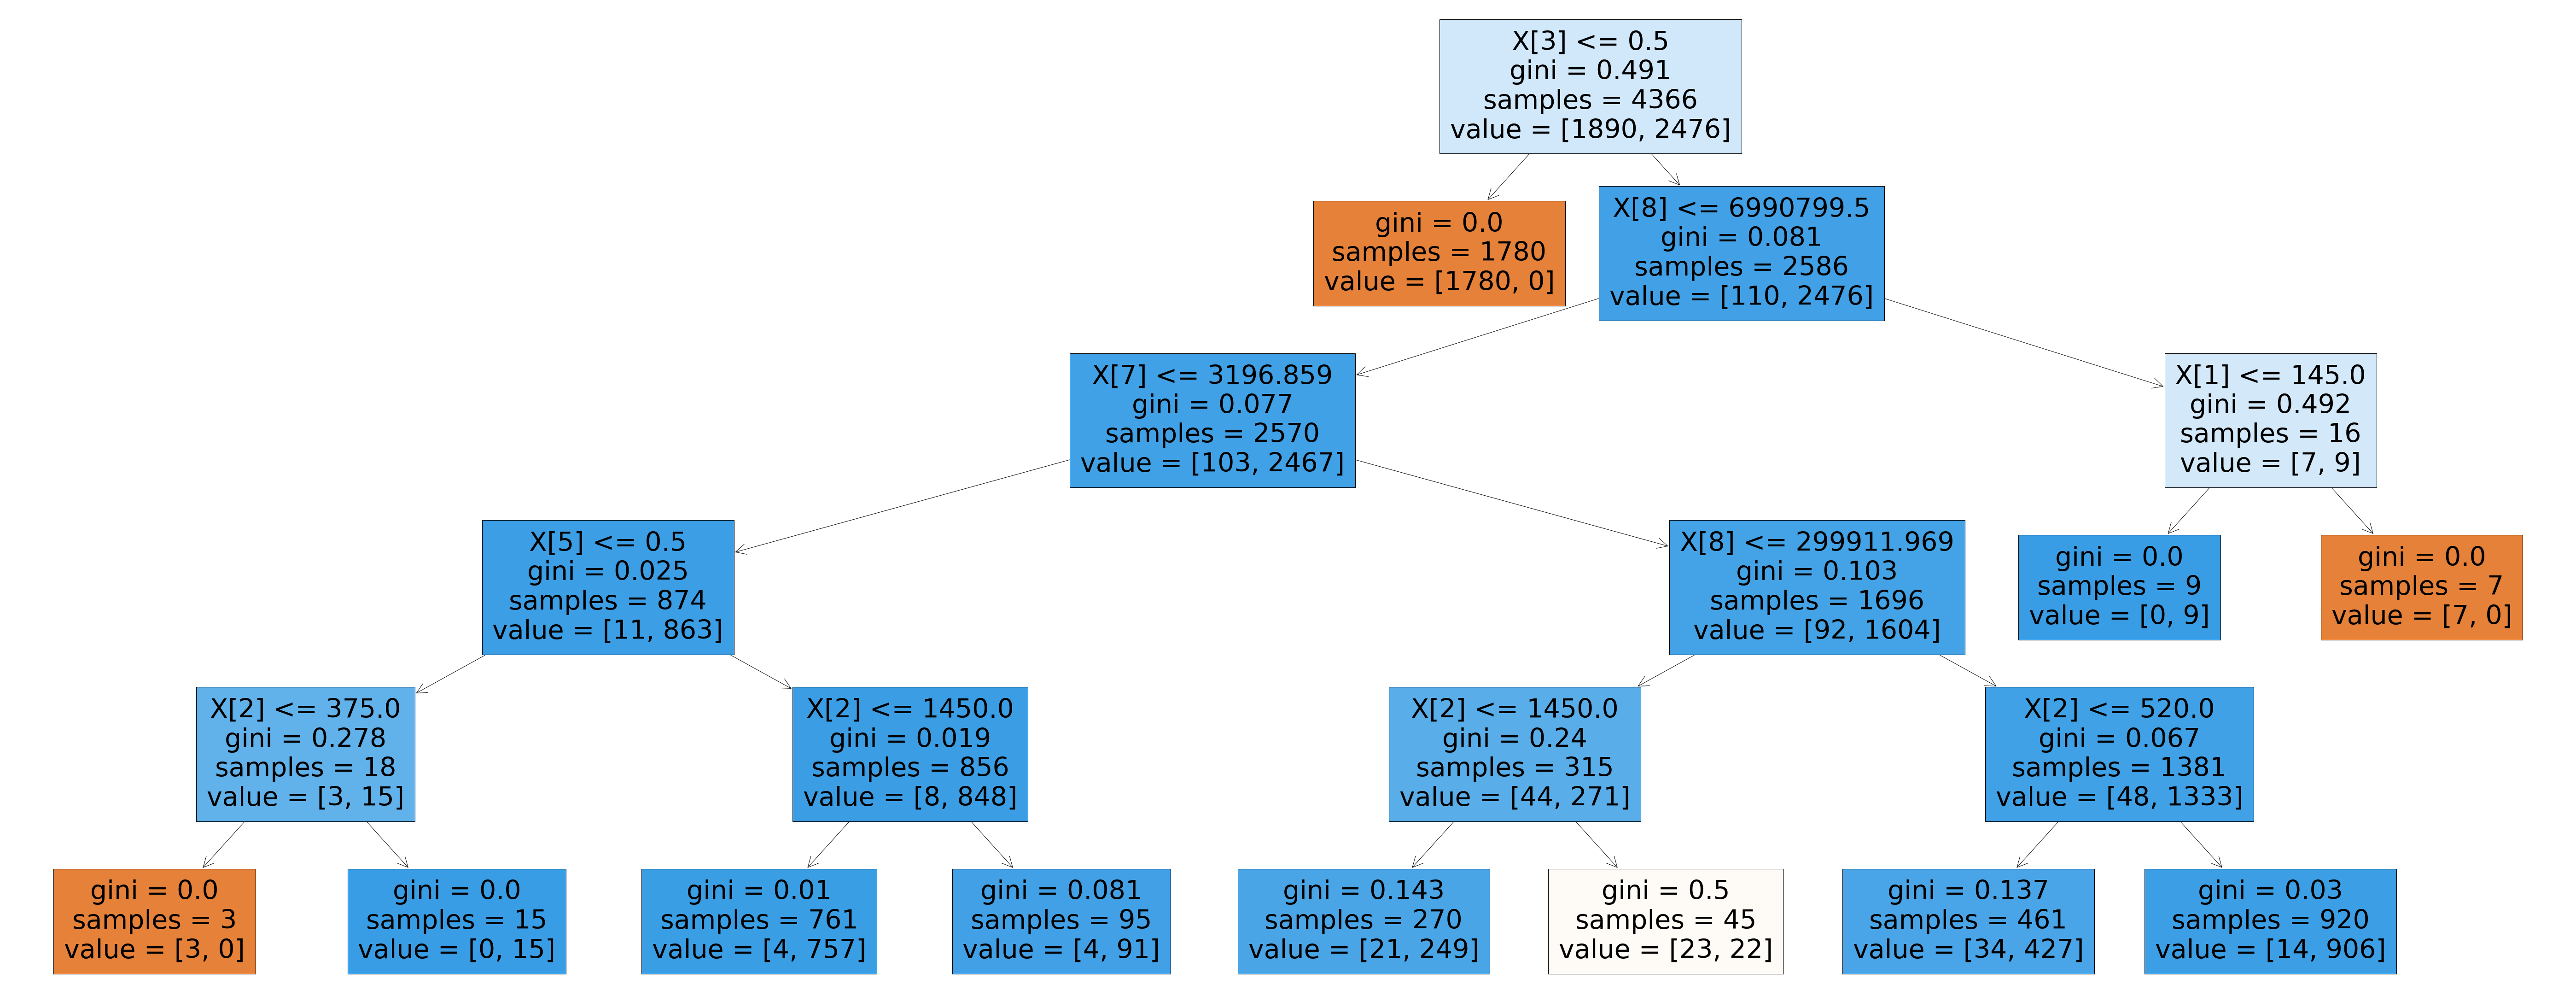

In [18]:
from sklearn import tree
plt.figure(figsize=(100,40))
tree.plot_tree(model,filled=True)

#### Pre-Prunning of Decision Tree

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params={'criterion':['gini','entropy','log-loss'],'splitter':['best','random'],'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt','log2']}

In [21]:
cv=GridSearchCV(model,param_grid=params,cv=5,scoring='accuracy')

In [22]:
cv.fit(X_train,y_train)

C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.wa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy', 'log-loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

## Predictions and Evaluations

In [24]:
y_pred=cv.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,y_pred))

[[ 828   44]
 [   0 1000]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       872
           1       0.96      1.00      0.98      1000

    accuracy                           0.98      1872
   macro avg       0.98      0.97      0.98      1872
weighted avg       0.98      0.98      0.98      1872



                                            Thanks for Visiting 🙏🙏